# **Algorithm Evaluation**

Comentários:

Esse notebook apresenta duas metodologias de avaliação de algoritmos. A primeira se chama hold-out em que se separa apenas um conjunto para treinamento e um conjunto para teste. Essa metodologia é útil quando se tem um conjunto grande de exemplos, de forma que apenas uma única partição de treinamento e teste tende a representar bem os dados do problema.

A outra metodologia é a de validação cruzada em que o conjunto de exemplo é dividido em K partições. O algoritmo sob análise é avaliado K vezes sendo que em cada execução uma partição é separada para teste e as demais partições foram o conjunto de treinamento. Esse experimento se chama k-fold cross validation, podendo ser repetido um dado número de vezes para aumentar robustez.

Apresentamos ainda várias métricas de desempenho preditivo com acurácia, precisão, cobertura, F1 e as curvas de precision-recal e a curva ROC.

**SETTINGS**

In [1]:
 from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.precision', 2)


**READING THE DATA FRAME**

In [3]:
df = pd.read_csv('/content/drive/My Drive/datasets/statlog-heart-dataset.csv')

df.head()

,age,sex,chest,pressure,cholestoral,bloodsugar,electrocardiographic,heartRate,exInducedAngina,oldpeak,slope,numMajorVessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,yes
1,57,1,2,124,261,0,0,141,0,0.3,1,0,7,yes
2,56,1,3,130,256,1,2,142,1,0.6,2,1,6,yes
3,59,1,4,110,239,0,2,142,1,1.2,2,1,7,yes
4,60,1,4,140,293,0,2,170,0,1.2,2,2,7,yes


**HOLDOUT EXPERIMENT - SPLITTING TRAINING AND TEST EXAMPLES**

In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['class'])
Y = df['class']

# Separando os dados em treinamento(75%) e teste(25%)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)




```
# Isto está formatado como código
```

### **LEARNING ALGORITHMS**

**LEARNING AND TESTING A DECISION TREE**

In [5]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 30)

dt.fit(X_train, Y_train)

Yhat_dt = dt.predict(X_test)



**LEARNING AND TESTING A RANDOM FOREST MODEL**

In [6]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, Y_train)

Yhat_rf = rf.predict(X_test)


**LEARNING AND TESTING THE kNN**

In [7]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Yhat_knn = knn.predict(X_test)


**LEARNING A LOGISTIC REGRESSION MODEL**

In [8]:

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# lr = make_pipeline(StandardScaler(), LogisticRegression())

lr = LogisticRegression(max_iter = 1000)

lr.fit(X_train, Y_train)

Yhat_lr = lr.predict(X_test)

coef = pd.DataFrame(lr.coef_)
coef.columns = X.columns

print(coef)


    age   sex  chest  pressure  cholestoral  bloodsugar  electrocardiographic  \
0 -0.01  0.94   0.58      0.02         0.01       -0.43                  0.43   

   heartRate  exInducedAngina  oldpeak  slope  numMajorVessels  thal  
0      -0.03             0.81     0.45   0.14             0.87  0.42  


**COMPUTING DIFFERENT PERFORMANCE METRICS**

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

metrics = pd.DataFrame(index = ['dt','rf','knn','lr'], columns = ['Acc','Prec','Rec','F1','AUC','AUPR'])

metrics.at['dt','Acc'] = accuracy_score(Y_test,Yhat_dt)
metrics.at['rf','Acc'] = accuracy_score(Y_test,Yhat_rf)
metrics.at['knn','Acc'] = accuracy_score(Y_test,Yhat_knn)
metrics.at['lr','Acc'] = accuracy_score(Y_test,Yhat_lr)


metrics.at['dt','Prec'] = precision_score(Y_test,Yhat_dt,pos_label='yes')
metrics.at['rf','Prec'] = precision_score(Y_test,Yhat_rf,pos_label='yes')
metrics.at['knn','Prec'] = precision_score(Y_test,Yhat_knn,pos_label='yes')
metrics.at['lr','Prec'] = precision_score(Y_test,Yhat_lr,pos_label='yes')

metrics.at['dt','Rec'] = recall_score(Y_test,Yhat_dt,pos_label='yes')
metrics.at['rf','Rec'] = recall_score(Y_test,Yhat_rf,pos_label='yes')
metrics.at['knn','Rec'] = recall_score(Y_test,Yhat_knn,pos_label='yes')
metrics.at['lr','Rec'] = recall_score(Y_test,Yhat_lr,pos_label='yes')

metrics.at['dt','F1'] = f1_score(Y_test,Yhat_dt,pos_label='yes')
metrics.at['rf','F1'] = f1_score(Y_test,Yhat_rf,pos_label='yes')
metrics.at['knn','F1'] = f1_score(Y_test,Yhat_knn,pos_label='yes')
metrics.at['lr','F1'] = f1_score(Y_test,Yhat_lr,pos_label='yes')

metrics.at['dt','AUC'] = roc_auc_score(Y_test,dt.predict_proba(X_test)[:, 1])
metrics.at['rf','AUC'] = roc_auc_score(Y_test,rf.predict_proba(X_test)[:, 1])
metrics.at['knn','AUC'] = roc_auc_score(Y_test,knn.predict_proba(X_test)[:, 1])
metrics.at['lr','AUC'] = roc_auc_score(Y_test,lr.predict_proba(X_test)[:, 1])

precision, recall, thresholds = precision_recall_curve(Y_test, dt.predict_proba(X_test)[:, 1],pos_label = 'yes')
metrics.at['dt','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, rf.predict_proba(X_test)[:, 1],pos_label = 'yes')
metrics.at['rf','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, knn.predict_proba(X_test)[:, 1],pos_label = 'yes')
metrics.at['knn','AUPR'] = auc_score = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(Y_test, lr.predict_proba(X_test)[:, 1],pos_label = 'yes')
metrics.at['lr','AUPR'] = auc_score = auc(recall, precision)


metrics



,Acc,Prec,Rec,F1,AUC,AUPR
dt,0.74,0.62,0.97,0.76,0.82,0.77
rf,0.82,0.79,0.79,0.79,0.91,0.92
knn,0.71,0.66,0.66,0.66,0.72,0.7
lr,0.88,0.86,0.86,0.86,0.91,0.91


Medidas de desempenho par classificação:  

*   Acurácia: Proporção de exemplos classificados corretamente, i.e., (VP + VN)/N onde N é o número de exemplos de teste;
*   Precisão: Proporção de predições positivas corretas, i.e., VP/(VP + FP)
*   Cobertura (Recall): Proporção de exemplos da classe positiva classificados corretamente, i.e., TP/(TP + FN);
*   F1: média harmônica entre precisão e cobertura, i.e., (2 x PREC x RECALL)/(PREC + RECALL).

Obs.: para F1 ter um valor alto, ambos os termos (precisão e cobertura) precisam ser altos.








Medidas de desepenho para rankings de exemplos (AUC E AUPR)

Dado um lote de exemplos de teste, eles podem ser ordenados pela probabilidade da classe positiva, estimada pelo modelo avaliado. Um ranking de exemplos é útil quando se deseja prioriza exemplos de maior probabilidade ou ainda mudar limiares de decisão visando por exemplo, aumentar taxa de verdadeiros positivos (recall).

Nesses casos, medidas de avaliação podem ser calculadas ao longo do ranking para gerar curvas de desempenho como a AUPR e AUC. A área sob essas curvas fornece uma medida global de qualidade do ranking de exemplos gerado pelo modelo.


**DISPLAYING THE PRECISION-RECALL CURVE**

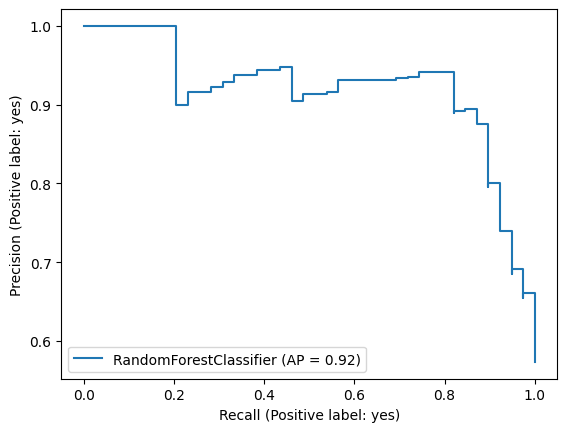

In [ ]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

PrecisionRecallDisplay.from_estimator(rf, X_test, Y_test)


**DISPLAYING THE ROC CURVE**

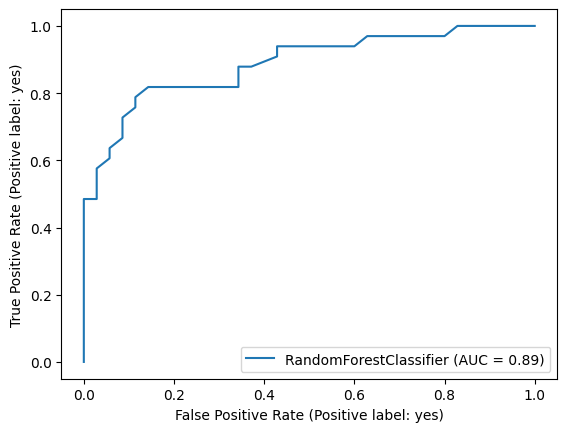

In [ ]:

from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(rf, X_test, Y_test)


**PERFORMING A CROSS-VALIDATION EXPERIMENT**

In [ ]:
from sklearn.model_selection import cross_val_score

accuracy = pd.DataFrame(index = ['dt','rf','knn'], columns = ['Avg','SD'])

dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 3,min_samples_leaf = 30)
rf = RandomForestClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

scores_dt = cross_val_score(dt, X, Y, cv=10)
scores_rf = cross_val_score(rf, X, Y, cv=10)
scores_knn = cross_val_score(knn, X, Y, cv=10)

accuracy.at['dt','Avg'] = np.mean(scores_dt)
accuracy.at['rf','Avg'] = np.mean(scores_rf)
accuracy.at['knn','Avg'] = np.mean(scores_knn)

accuracy.at['dt','SD'] = np.std(scores_dt)
accuracy.at['rf','SD'] = np.std(scores_rf)
accuracy.at['knn','SD'] = np.std(scores_knn)

accuracy

,Avg,SD
dt,0.74,0.06
rf,0.83,0.08
knn,0.66,0.04


**Other common algorithms (there are many!)**


*   Naive Bayes
*   XGBoost
*   Support Vertor Machines
*   Multi-Layer Perceptron
*   Bagging, Boosting

